In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura do CSV

In [2]:
df = pd.read_csv('../data/input/read-database-licitacao-vencedores.csv', encoding="unicode-escape", sep = ';')
df

,id_hom_licitacao,id_licitacao,id_item_licitacao,id_orgao,ano_referencia,mes_exercicio,qtde_item_show,vlr_unitario_show,vlr_pct_desconto_show,vlr_pct_tax_adm_show,vlr_global_show,num_cpf_cnpj_vencedor_show,cod_tipo_pessoa_vencedor,nome_vencedor_show,num_lote_show,dsc_lote_show,cod_item,num_item,dsc_item_show,dsc_unid_medida_show
0,39143003,297095,10000108,2148,2017,10,50.56,15.87,0.0,0.0,0.0,05508142000188,J,PRE-MOLDADOS MENEZES V.PALMA LTDA-ME,NaN,LOTE NAO INFORMADO,42128,389,5.2.4 ENCUNHAMENTO (APERTO DE ALVENARIA) EM TI...,METRO
1,38362363,297095,10000172,2148,2017,10,386.12,42.78,0.0,0.0,0.0,05508142000188,J,PRE-MOLDADOS MENEZES V.PALMA LTDA-ME,NaN,LOTE NAO INFORMADO,42225,6,10.1.3 PISO CIMENTADO DESEMPENADO COM ACABAMEN...,M²
2,38940198,297095,10000304,2148,2017,10,15.00,58.78,0.0,0.0,0.0,05508142000188,J,PRE-MOLDADOS MENEZES V.PALMA LTDA-ME,NaN,LOTE NAO INFORMADO,42395,158,"15.12 CHUVEIRO MAXI DUCHA, LORENZETTI,COM MANG...",UNIDADE
3,39207917,297095,10000454,2148,2017,10,153.39,3.42,0.0,0.0,0.0,05508142000188,J,PRE-MOLDADOS MENEZES V.PALMA LTDA-ME,NaN,LOTE NAO INFORMADO,42557,317,"19.1 TUBO PVC SOLDAVEL 25MM, INCLUSIVE CONEXOES",METRO
4,39409430,297095,10000472,2148,2017,10,28.00,12.37,0.0,0.0,0.0,05508142000188,J,PRE-MOLDADOS MENEZES V.PALMA LTDA-ME,NaN,LOTE NAO INFORMADO,42583,336,20.4.1 TOMADA MODULAR RJ-45 CATEGORIA 6 (COMPL...,UNIDADE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11731823,37684895,297050,9998875,2148,2017,3,60.00,3.00,0.0,0.0,0.0,04930131000129,J,NATHALIA DISTRIBUIDORA LTDA ME,NaN,LOTE NAO INFORMADO,37177,27,ESSENCIA AROMATIZANTE VD /100ML ( ERVA DOCE E ...,VIDRO
11731824,39042315,297052,9998909,2148,2017,3,1000.00,0.70,0.0,0.0,0.0,10670994000107,J,PAPELARIA E DISTRIBUIDORA SULAMERICANA LTDA ME,NaN,LOTE NAO INFORMADO,9827,103,PAPEL CAMURCA 40X60 CM CORES VARIADAS,FOLHA
11731825,38906384,297059,9999325,2148,2017,4,4.00,257.14,0.0,0.0,0.0,11916549000147,J,REGES GERALDO DE LISBOA 08094364696 - ME,NaN,LOTE NAO INFORMADO,50799,9,"TORTA 50 TUBOS 1,5 EM LEQUE",UNIDADE
11731826,39546064,297085,9999725,2148,2017,8,3.00,47.00,0.0,0.0,0.0,25220682000179,J,ODONTONORTE EQUIP. SERV. MED. ODONT. LTDA,NaN,LOTE NAO INFORMADO,51477,21,CHAVE DE LIGA DESLIGA REFLETOR PEDAL,UNID


## Filtragem das Licitações por Lotes

### Número de Lotes Por Licitação

#### Tabela

In [3]:
lotesPorLicitacoes = df[['id_licitacao', 'id_item_licitacao']]                                                                                      # Filtra as colunas do Dataframe original
lotesPorLicitacoes = lotesPorLicitacoes.rename({'id_licitacao': 'Id da Licitação', 'id_item_licitacao': 'Item da Licitação'}, axis='columns')       # Renomeia as colunas do Dataframe
lotesPorLicitacoes = lotesPorLicitacoes.groupby(['Id da Licitação'])                                                                                # Agrupa os dados por número da licitação
lotesPorLicitacoes = lotesPorLicitacoes.size()                                                                                                      # Cria uma coluna de contagem de registros de produtos (lotes) agrupados por número da licitação e transformando o Dataframe em uma Série
lotesPorLicitacoes = lotesPorLicitacoes.reset_index(name="Número de Produtos")                                                                      # Renomeia a coluna criada no comando anterior transformando a Série de volta em Dataframe
lotesPorLicitacoes

,Id da Licitação,Número de Produtos
0,953,8
1,954,3
2,955,1
3,956,64
4,957,2
...,...,...
360435,723436,38
360436,723437,1
360437,723438,1
360438,723439,1


#### Gráfico

<AxesSubplot:xlabel='Licitações', ylabel='Número de Lotes'>

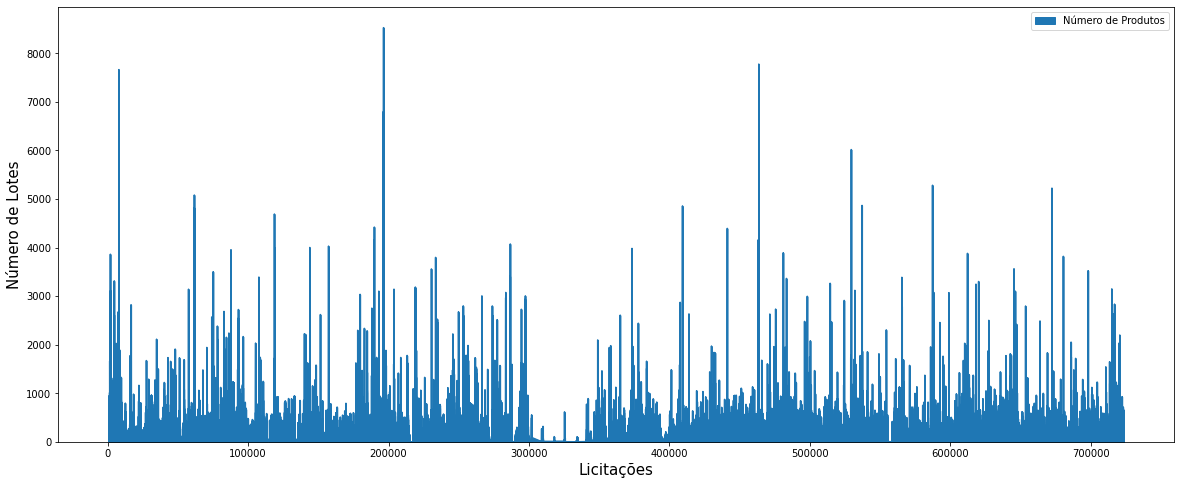

In [4]:
plotagemGraficoNumLotes = lotesPorLicitacoes.plot(x = "Id da Licitação", y = 'Número de Produtos', kind="area", figsize=(20, 8))
plotagemGraficoNumLotes.xaxis.label.set_size(15)
plotagemGraficoNumLotes.yaxis.label.set_size(15)
plotagemGraficoNumLotes.set_xlabel('Licitações')
plotagemGraficoNumLotes.set_ylabel('Número de Lotes')
plotagemGraficoNumLotes

### Top 10 Licitações com Mais Lotes

In [5]:
lotesPorLicitacoes.sort_values(by = ['Número de Produtos'], ascending = False).head(10)

,Id da Licitação,Número de Produtos
107296,196429,8527
227837,463637,7777
4800,7920,7663
107231,196364,6802
107177,196310,6578
262714,529521,6017
292923,587367,5282
333714,672417,5223
33168,61679,5081
265001,537180,4867


### Top 10 Licitações com Menos Lotes

In [6]:
lotesPorLicitacoes.sort_values(by = ['Número de Produtos']).head(10)

,Id da Licitação,Número de Produtos
360439,723440,1
264237,534842,1
264235,534840,1
113055,205413,1
264232,534722,1
264231,534721,1
264230,534720,1
113052,205410,1
113062,205420,1
113066,205424,1


## Filtragem das Licitações por Vencedor

### Maiores Vencedores de Lotes de Licitação

#### Gráfico

In [7]:
vencedoresDeLote = df[['id_licitacao', 'nome_vencedor_show']]                                                                                        # Filtra as colunas do Dataframe original
vencedoresDeLote = vencedoresDeLote.rename({'id_licitacao': 'Id da Licitação', 'nome_vencedor_show': 'Vencedor da Licitação'}, axis='columns')       # Renomeia as colunas do Dataframe
vencedoresDeLote = vencedoresDeLote.groupby(['Vencedor da Licitação'])                                                                                     # Agrupa os dados por vencedor
vencedoresDeLote = vencedoresDeLote.size()                                                                                                           # Cria uma coluna de contagem de registros de lotes ganhos agrupados por ganhador e transformando o Dataframe em uma Série
vencedoresDeLote = vencedoresDeLote.reset_index(name="Lotes de Licitações Ganhos")                                                                   # Renomeia a coluna criada no comando anterior transformando a Série de volta em Dataframe
vencedoresDeLote

,Vencedor da Licitação,Lotes de Licitações Ganhos
0,',3
1,'' MOSAICO ARTES GRAFICAS LTDA - ME,5
2,'MARIA JOSE DA SILVA,1
3,'SUSTENTARE ASSESSORIA E CONSULT. EM ADMIN.PUB...,6
4,'TIDIMAR COMERCIO DE PRODUTOS MEDICOS HOSPITAL...,5
...,...,...
178192,ZZ PNEUS LTDA.-ME,68
178193,ZZ PNEUS SERVICOS EIRELI - ME,23
178194,],9
178195,`` COIMA CONSTRUTORA DE INFRA ESTRUTURA E MEI...,1


#### Tabela

<AxesSubplot:xlabel='Vencedores', ylabel='Lotes de Licitações Ganhos'>

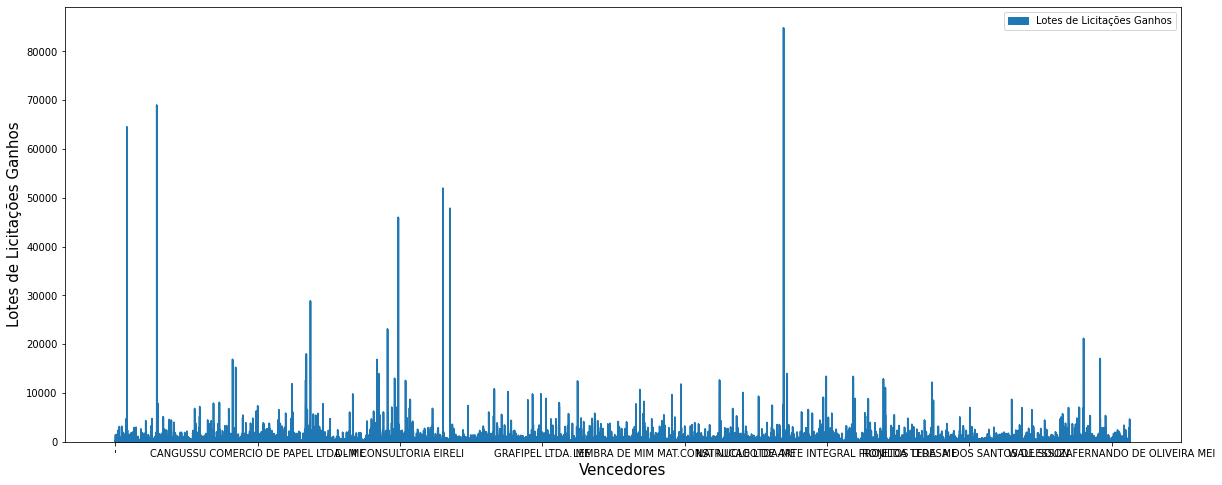

In [8]:
plotagemGraficoMaioresVencedores = vencedoresDeLote.plot(x = 'Vencedor da Licitação', y = 'Lotes de Licitações Ganhos', kind="area", figsize=(20, 8))
plotagemGraficoMaioresVencedores.xaxis.label.set_size(15)
plotagemGraficoMaioresVencedores.yaxis.label.set_size(15)
plotagemGraficoMaioresVencedores.set_xlabel('Vencedores')
plotagemGraficoMaioresVencedores.set_ylabel('Lotes de Licitações Ganhos')
plotagemGraficoMaioresVencedores

### Top 10 Maiores Vencedores de Lotes de Licitação

In [9]:
vencedoresDeLote.sort_values(by = ['Lotes de Licitações Ganhos'], ascending = False).head(10)

,Vencedor da Licitação,Lotes de Licitações Ganhos
117357,MED CENTER COMERCIAL LTDA,84833
7265,ALFALAGOS LTDA,69008
2028,ACACIA COMERCIO DE MEDICAMENTOS LTDA,64535
57522,EMIGE MATERIAIS ODONTOLOGICOS LTDA,51979
58749,EQUIPAR MEDICO E HOSPITALAR LTDA,47863
49692,DISTRIMIX DISTRIBUIDORA DE MEDICAMENTOS LTDA,46020
34252,COMERCIAL CIRURGICA RIOCLARENSE LTDA,28886
117363,MED CENTER COMERCIAL LTDA.,23897
47798,DIMEBRAS COMERCIAL HOSPITALAR LTDA,23142
170051,VALEMAC LTDA,21227


## Número de Licitações com Lotes Informados

In [10]:
licitacoesComLotesInformados = df[df['dsc_lote_show'] != 'LOTE NAO INFORMADO'][['id_licitacao', 'dsc_lote_show']]
print("Licitações com os Lotes Informados: ", len(licitacoesComLotesInformados.index))
print("Número Total de Lotes: ", len(df.index))

Licitações com os Lotes Informados:  4076464
Número Total de Lotes:  11731828
